# EDA To Prediction


## Contents of the Notebook:

#### Part1: Exploratory Data Analysis(EDA):
1)Analysis of the features.

2)Finding any relations or trends considering multiple features.
#### Part2: Feature Engineering and Data Cleaning:
1)Adding any few features.

2)Removing redundant features.

3)Converting features into suitable form for modeling.
#### Part3: Predictive Modeling
1)Running Basic Algorithms.

2)Cross Validation.

3)Ensembling.

4)Important Features Extraction.

## Part1: Exploratory Data Analysis(EDA)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [67]:
data=pd.read_csv('train.csv')
#FOR TEST FILE
#data=pd.read_csv('test.csv')

In [68]:
data.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,696,706,762234,762239,26,13,7,3330,120,140,...,0.0074,0.7692,0.7143,0.0,1.4150,1.0000,0.6990,-0.5000,0.0006,0.1569
1,99,129,2634035,2634039,75,30,7,9556,104,149,...,0.0218,1.0000,0.5714,0.0,1.8751,1.4771,0.6021,-0.8667,-0.0046,0.2288
2,297,302,1028213,1028219,16,5,6,1990,120,132,...,0.0037,1.0000,1.0000,1.0,1.2041,0.6990,0.7782,0.1667,-0.0283,0.1400
3,0,225,344016,344225,25473,992,578,3061597,23,148,...,0.1607,0.2268,0.3616,0.0,4.4061,2.3522,2.3201,-0.0711,-0.0610,1.0000
4,1587,1602,211409,211458,323,51,53,33607,88,119,...,0.0089,0.2941,0.9245,1.0,2.5092,1.1761,1.6902,0.6939,-0.1871,0.9471


In [4]:
data.isnull().sum() #checking for total null values

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Faults                   0
dtype: int64

#### No NULL values

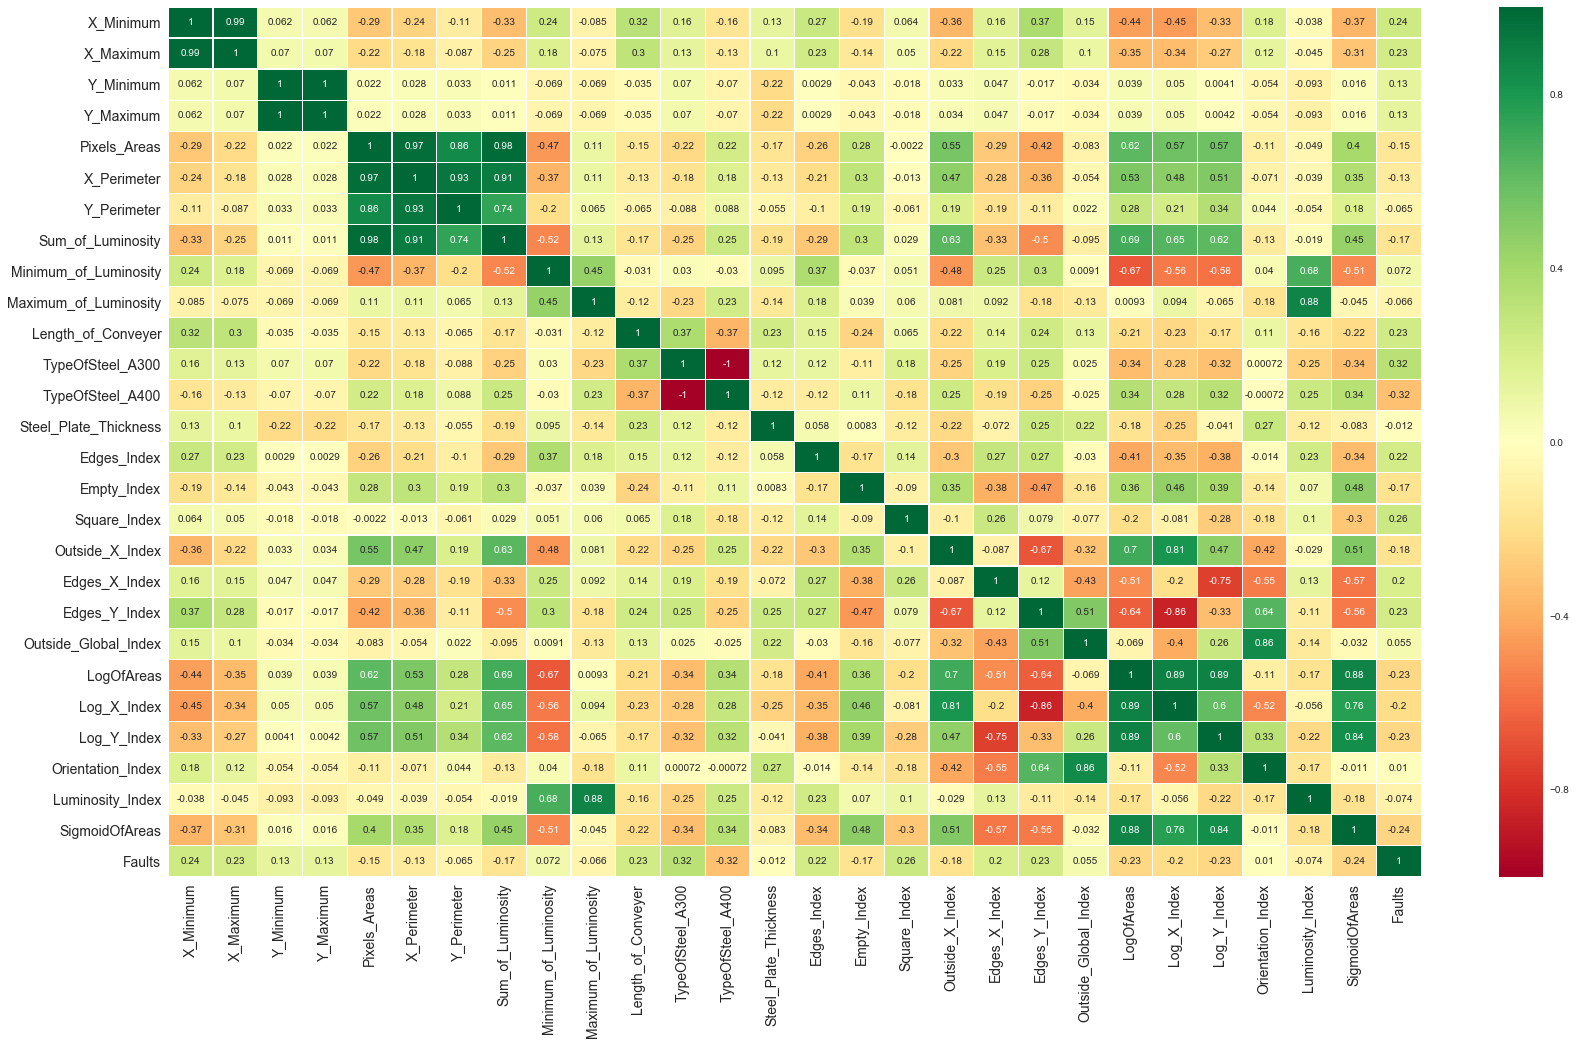

In [5]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(25,16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Correlation Between The Features

### Interpreting The Heatmap

**POSITIVE CORRELATION:** If an **increase in feature A leads to increase in feature B, then they are positively correlated**. A value **1 means perfect positive correlation**.

**NEGATIVE CORRELATION:** If an **increase in feature A leads to decrease in feature B, then they are negatively correlated**. A value **-1 means perfect negative correlation**.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as **MultiColinearity** as both of them contains almost the same information.

So do you think we should use both of them as **one of them is redundant**. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that some features are correlated. They are:

### How many with Faults??

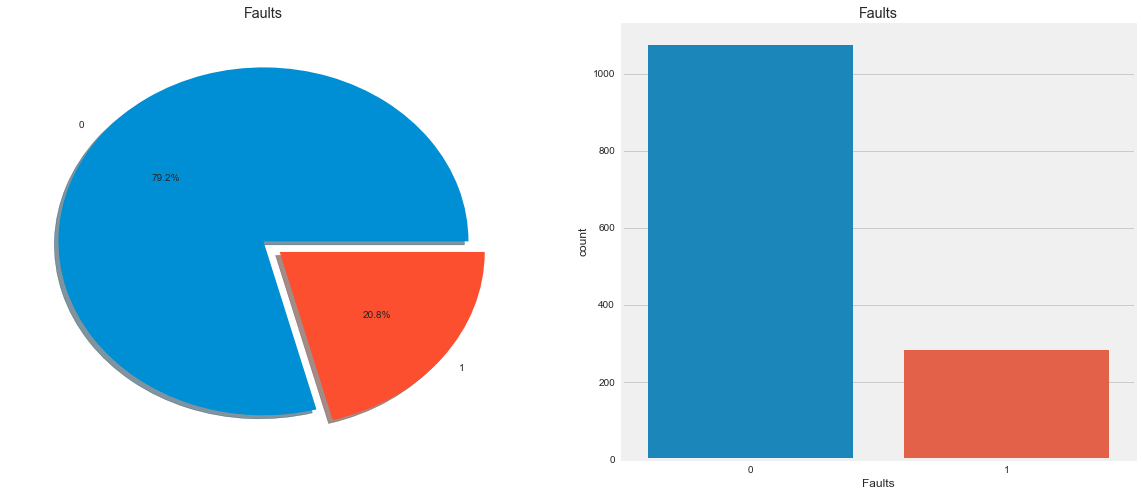

In [6]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Faults'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Faults')
ax[0].set_ylabel('')
sns.countplot('Faults',data=data,ax=ax[1])
ax[1].set_title('Faults')
plt.show()

It is evident that not many are with Faults. 

Out of 1358 things in training set, only around 290 are with Faults i.e Only **20.8%**. We need to dig down more to get better insights from the data and see which categories of the things did are with Faults and which are not.

We will try to check the "with Faults" rate by using the different features of the dataset. Some of the features being Pixel Areas, Length of Conveyer, Type of Steel,etc.

First let us understand the different types of features.

## Types Of Features

### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as **Nominal Variables**.

**Categorical Features in the dataset: TypeOfSteel, Outside_Global_Index.**

### Ordinal Features:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like **Height** with values **Tall, Medium, Short**, then Height is a ordinal variable. Here we can have a relative sort in the variable.


### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

**Continous Features in the dataset:** Many

## Analysing The Features

#### Categorical Feature 1

In [7]:
data.groupby(['TypeOfSteel_A300','Faults'])['Faults'].count()

TypeOfSteel_A300  Faults
0                 0         729
                  1          82
1                 0         346
                  1         201
Name: Faults, dtype: int64

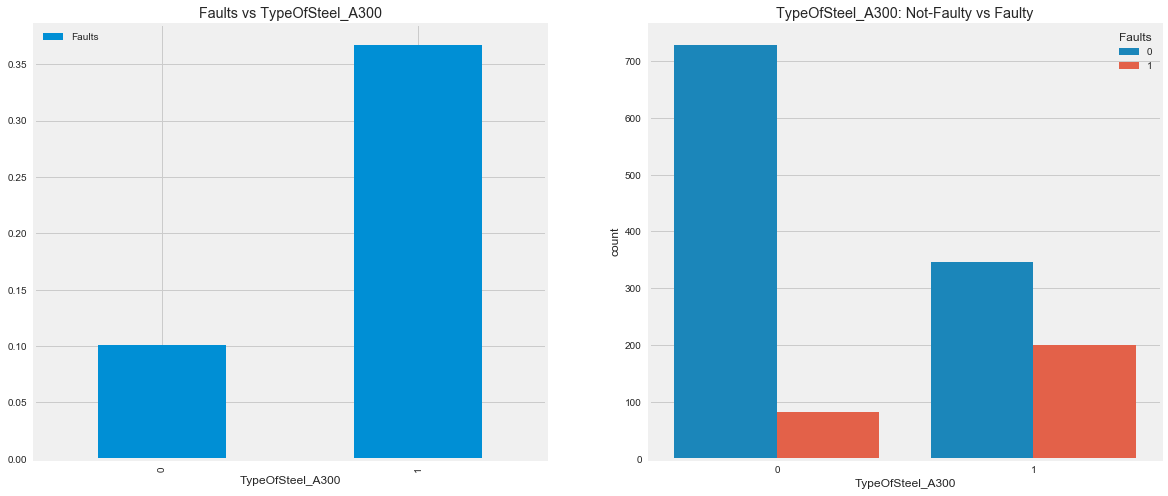

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['TypeOfSteel_A300','Faults']].groupby(['TypeOfSteel_A300']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Faults vs TypeOfSteel_A300')
sns.countplot('TypeOfSteel_A300',hue='Faults',data=data,ax=ax[1])
ax[1].set_title('TypeOfSteel_A300: Not-Faulty vs Faulty')
plt.show()

#### Categorical Feature 2

In [9]:
data.groupby(['TypeOfSteel_A400','Faults'])['Faults'].count()

TypeOfSteel_A400  Faults
0                 0         346
                  1         201
1                 0         729
                  1          82
Name: Faults, dtype: int64

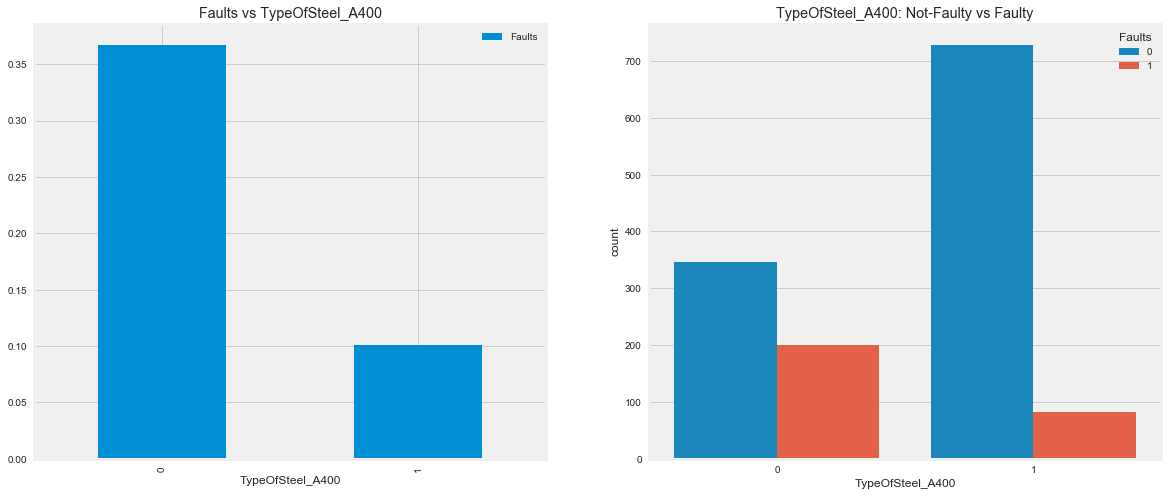

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['TypeOfSteel_A400','Faults']].groupby(['TypeOfSteel_A400']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Faults vs TypeOfSteel_A400')
sns.countplot('TypeOfSteel_A400',hue='Faults',data=data,ax=ax[1])
ax[1].set_title('TypeOfSteel_A400: Not-Faulty vs Faulty')
plt.show()

#### Categorical Feature 3

In [92]:
#Performing One Hot Encoding
data['Outside_Global_Index'] = data['Outside_Global_Index'].map({0.5: 2,1:1,0:0})
onehot=pd.get_dummies(data['Outside_Global_Index'])
data=data.drop('Outside_Global_Index',axis=1)
data=data.join(onehot)
data.head(1)

,TypeOfSteel_A300,TypeOfSteel_A400,outx,xmax,pixarea,xper,sigarea,lumosindex,orindex,logxindex,...,emptyindex,edgesindex,maxlumos,minlumos,stplthick,locon,ymax,0,1,2
0,0,1,-0.48738,0.256748,-1.390408,-0.88857,-1.303925,0.912477,-1.077067,-0.737232,...,0.471611,2.127189,0.484563,1.146721,-0.527684,-0.66355,-0.159326,1,0,0


In [93]:
data.rename(columns={0:"Outside0",1:"Outside1",2:"Outside0.5"},inplace=True)
data.head(1)

,TypeOfSteel_A300,TypeOfSteel_A400,outx,xmax,pixarea,xper,sigarea,lumosindex,orindex,logxindex,...,emptyindex,edgesindex,maxlumos,minlumos,stplthick,locon,ymax,Outside0,Outside1,Outside0.5
0,0,1,-0.48738,0.256748,-1.390408,-0.88857,-1.303925,0.912477,-1.077067,-0.737232,...,0.471611,2.127189,0.484563,1.146721,-0.527684,-0.66355,-0.159326,1,0,0


## Continous Features


In [13]:
#removing "Faults" from dataframe to make further manipulation easier
Faultt = data['Faults']
data.drop(['Faults'],axis=1,inplace=True)

## 0

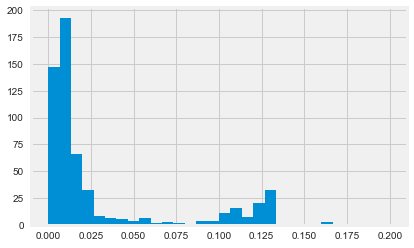

In [69]:
plt.figure()
_=plt.hist(data['Outside_X_Index'],bins=30,range=(0,0.2))
#MEAN NORMALIZING
xmaxmean=data['Outside_X_Index'].mean()
xmaxstd=data['Outside_X_Index'].std()
xmax0=(data['Outside_X_Index']-xmaxmean)/xmaxstd
data['outx']=xmax0
data.drop(['Outside_X_Index'],axis=1,inplace=True)

## 1

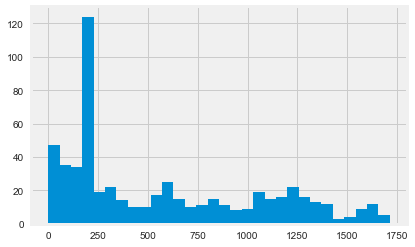

In [70]:
# Pretty Normal so no need of taking Log or SQRT
plt.figure()
_=plt.hist(data['X_Maximum'],bins=30,range=[0,1713])
#MEAN NORMALIZING
xmaxmean=data['X_Maximum'].mean()
xmaxstd=data['X_Maximum'].std()
xmax0=(data.X_Maximum-xmaxmean)/xmaxstd
data['xmax']=xmax0
data.drop(['X_Maximum'],axis=1,inplace=True)

## 2

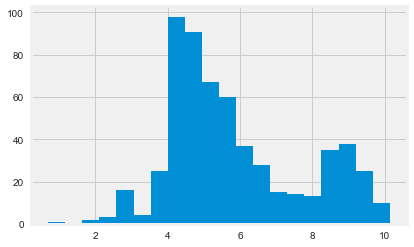

In [71]:
xmax2=np.log(data['Pixels_Areas'])
plt.figure()
_=plt.hist(xmax2,bins=20)
xmaxmean=xmax2.mean()
xmaxstd=xmax2.std()
xmax2=(xmax2-xmaxmean)/xmaxstd
data['pixarea']=xmax2
data.drop(['Pixels_Areas'],axis=1,inplace=True)

## 3

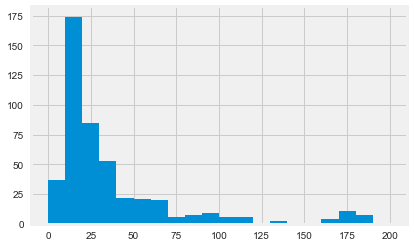

In [72]:
plt.figure()
_=plt.hist(data['X_Perimeter'],bins=20,range=[0,200])
xmaxn=np.log(data['X_Perimeter'])
xmaxmean=xmaxn.mean()
xmaxstd=xmaxn.std()
xmaxn=(xmaxn-xmaxmean)/xmaxstd
data['xper']=xmaxn
data.drop(['X_Perimeter'],axis=1,inplace=True)

## 4

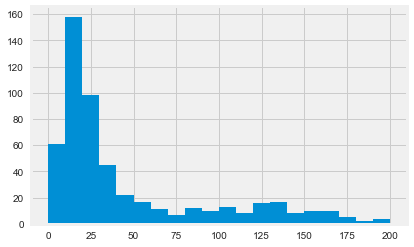

In [73]:
plt.figure()
_=plt.hist(data['Y_Perimeter'],bins=20,range=[0,200])
xmax3=np.log(data['Y_Perimeter'])
xmaxmean=xmax3.mean()
xmaxstd=xmax3.std()
xmax3=(xmax3-xmaxmean)/xmaxstd
data['yper']=xmax3
data.drop(['Y_Perimeter'],axis=1,inplace=True)

## 5

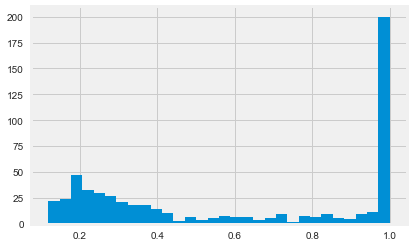

In [74]:
plt.figure()
_=plt.hist(data['SigmoidOfAreas'],bins=30)
xmax5=data['SigmoidOfAreas']
xmaxmean=xmax5.mean()
xmaxstd=xmax5.std()
xmax5=(xmax5-xmaxmean)/xmaxstd
data['sigarea']=xmax5
data.drop(['SigmoidOfAreas'],axis=1,inplace=True)

## 6

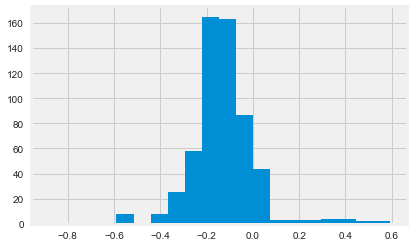

In [75]:
plt.figure()
_=plt.hist(data['Luminosity_Index'],bins=20)
xmax6=data['Luminosity_Index']
xmaxmean=xmax6.mean()
xmaxstd=xmax6.std()
xmax6=(xmax6-xmaxmean)/xmaxstd
data['lumosindex']=xmax6
data.drop(['Luminosity_Index'],axis=1,inplace=True)

## 7

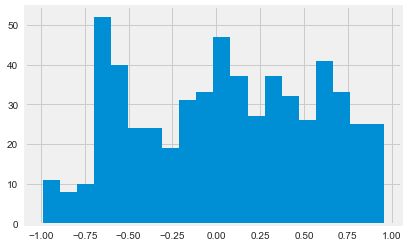

In [76]:
plt.figure()
_=plt.hist(data['Orientation_Index'],bins=20)
xmax7=data['Orientation_Index']
xmaxmean=xmax7.mean()
xmaxstd=xmax7.std()
xmax7=(xmax7-xmaxmean)/xmaxstd
data['orindex']=xmax7
data.drop(['Orientation_Index'],axis=1,inplace=True)

## 8

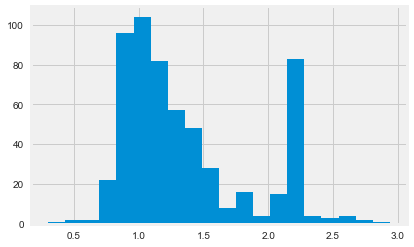

In [77]:
plt.figure()
_=plt.hist(data['Log_X_Index'],bins=20)
xmax9=data['Log_X_Index']
xmaxmean=xmax9.mean()
xmaxstd=xmax9.std()
xmax9=(xmax9-xmaxmean)/xmaxstd
data['logxindex']=xmax9
data.drop(['Log_X_Index'],axis=1,inplace=True)

## 9

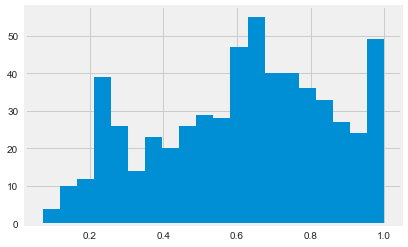

In [78]:
plt.figure()
_=plt.hist(data['Edges_X_Index'],bins=20)
xmax11=data['Edges_X_Index']
xmaxmean=xmax11.mean()
xmaxstd=xmax11.std()
xmax11=(xmax11-xmaxmean)/xmaxstd
data['edgesx']=xmax11
data.drop(['Edges_X_Index'],axis=1,inplace=True)

## 10

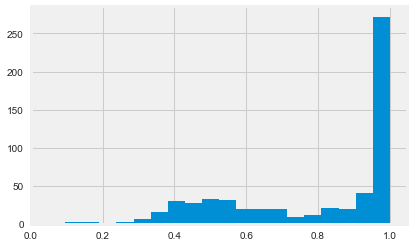

In [79]:
plt.figure()
_=plt.hist(data['Edges_Y_Index'],bins=20)
xmax12=data['Edges_Y_Index']
xmaxmean=xmax12.mean()
xmaxstd=xmax12.std()
xmax12=(xmax12-xmaxmean)/xmaxstd
data['edgesy']=xmax12
data.drop(['Edges_Y_Index'],axis=1,inplace=True)

## 11

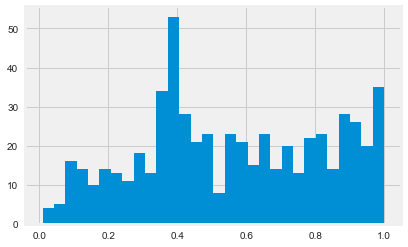

In [80]:
plt.figure()
_=plt.hist(data['Square_Index'],bins=30)
xmax14=data['Square_Index']
xmaxmean=xmax14.mean()
xmaxstd=xmax14.std()
xmax14=(xmax14-xmaxmean)/xmaxstd
data['sqindex']=xmax14
data.drop(['Square_Index'],axis=1,inplace=True)

## 12

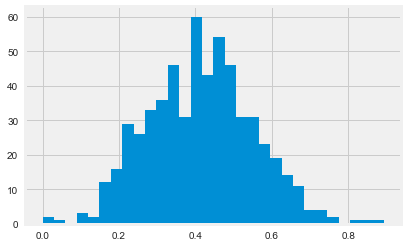

In [81]:
plt.figure()
_=plt.hist(data['Empty_Index'],bins=30)
xmax15=data['Empty_Index']
xmaxmean=xmax15.mean()
xmaxstd=xmax15.std()
xmax15=(xmax15-xmaxmean)/xmaxstd
data['emptyindex']=xmax15
data.drop(['Empty_Index'],axis=1,inplace=True)

## 13

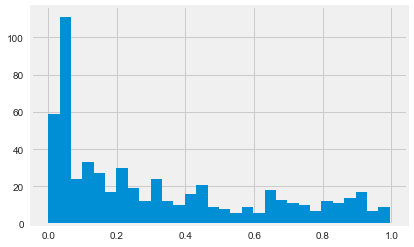

In [82]:
plt.figure()
_=plt.hist(data['Edges_Index'],bins=30)
xmax16=data['Edges_Index']
xmaxmean=xmax16.mean()
xmaxstd=xmax16.std()
xmax16=(xmax16-xmaxmean)/xmaxstd
data['edgesindex']=xmax16
data.drop(['Edges_Index'],axis=1,inplace=True)

## 14

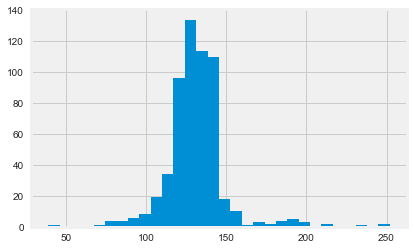

In [83]:
plt.figure()
_=plt.hist(data['Maximum_of_Luminosity'],bins=30)
xmax17=data['Maximum_of_Luminosity']
xmaxmean=xmax17.mean()
xmaxstd=xmax17.std()
xmax17=(xmax17-xmaxmean)/xmaxstd
data['maxlumos']=xmax17
data.drop(['Maximum_of_Luminosity'],axis=1,inplace=True)

## 15

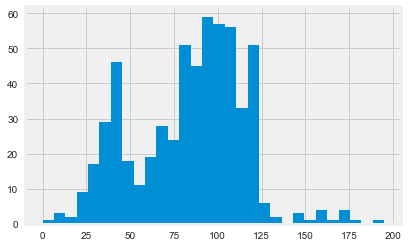

In [84]:
plt.figure()
_=plt.hist(data['Minimum_of_Luminosity'],bins=30)
xmax18=data['Minimum_of_Luminosity']
xmaxmean=xmax18.mean()
xmaxstd=xmax18.std()
xmax18=(xmax18-xmaxmean)/xmaxstd
data['minlumos']=xmax18
data.drop(['Minimum_of_Luminosity'],axis=1,inplace=True)

## 16

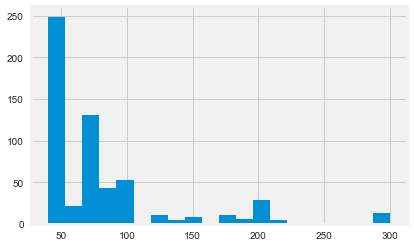

In [85]:
plt.figure()
_=plt.hist(data['Steel_Plate_Thickness'],bins=20)
xmax19=data['Steel_Plate_Thickness']
xmaxmean=xmax19.mean()
xmaxstd=xmax19.std()
xmax19=(xmax19-xmaxmean)/xmaxstd
data['stplthick']=xmax19
data.drop(['Steel_Plate_Thickness'],axis=1,inplace=True)

## 17

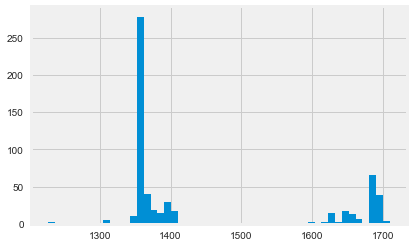

In [86]:
plt.figure()
_=plt.hist(data['Length_of_Conveyer'],bins=50)
xmax20=data['Length_of_Conveyer']
xmaxmean=xmax20.mean()
xmaxstd=xmax20.std()
xmax20=(xmax20-xmaxmean)/xmaxstd
data['locon']=xmax20
data.drop(['Length_of_Conveyer'],axis=1,inplace=True)

## 18

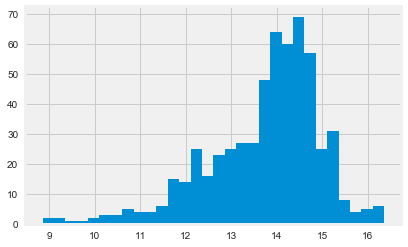

In [87]:
# Pretty Normal so no need of taking Log or SQRT
xmax0=np.log(data['Y_Maximum'])
plt.figure()
_=plt.hist(xmax0,bins=30)

#MEAN NORMALIZING
xmaxmean=xmax0.mean()
xmaxstd=xmax0.std()
xmax0=(xmax0-xmaxmean)/xmaxstd
data['ymax']=xmax0
data.drop(['Y_Maximum'],axis=1,inplace=True)

In [88]:
data.head(1)

,X_Minimum,Y_Minimum,Sum_of_Luminosity,TypeOfSteel_A300,TypeOfSteel_A400,Outside_Global_Index,LogOfAreas,Log_Y_Index,outx,xmax,...,edgesx,edgesy,sqindex,emptyindex,edgesindex,maxlumos,minlumos,stplthick,locon,ymax
0,696,762234,3330,0,1,0.0,1.415,0.699,-0.48738,0.256748,...,0.643822,-0.332552,-0.229458,0.471611,2.127189,0.484563,1.146721,-0.527684,-0.66355,-0.159326


## Part2: Feature Engineering and Data Cleaning

Now what is Feature Engineering?

Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.

An example would be getting the Initals feature using the Name Feature. Lets see if we can get any new features and eliminate a few. Also we will tranform the existing relevant features to suitable form for Predictive Modeling.

### Dropping UnNeeded Features


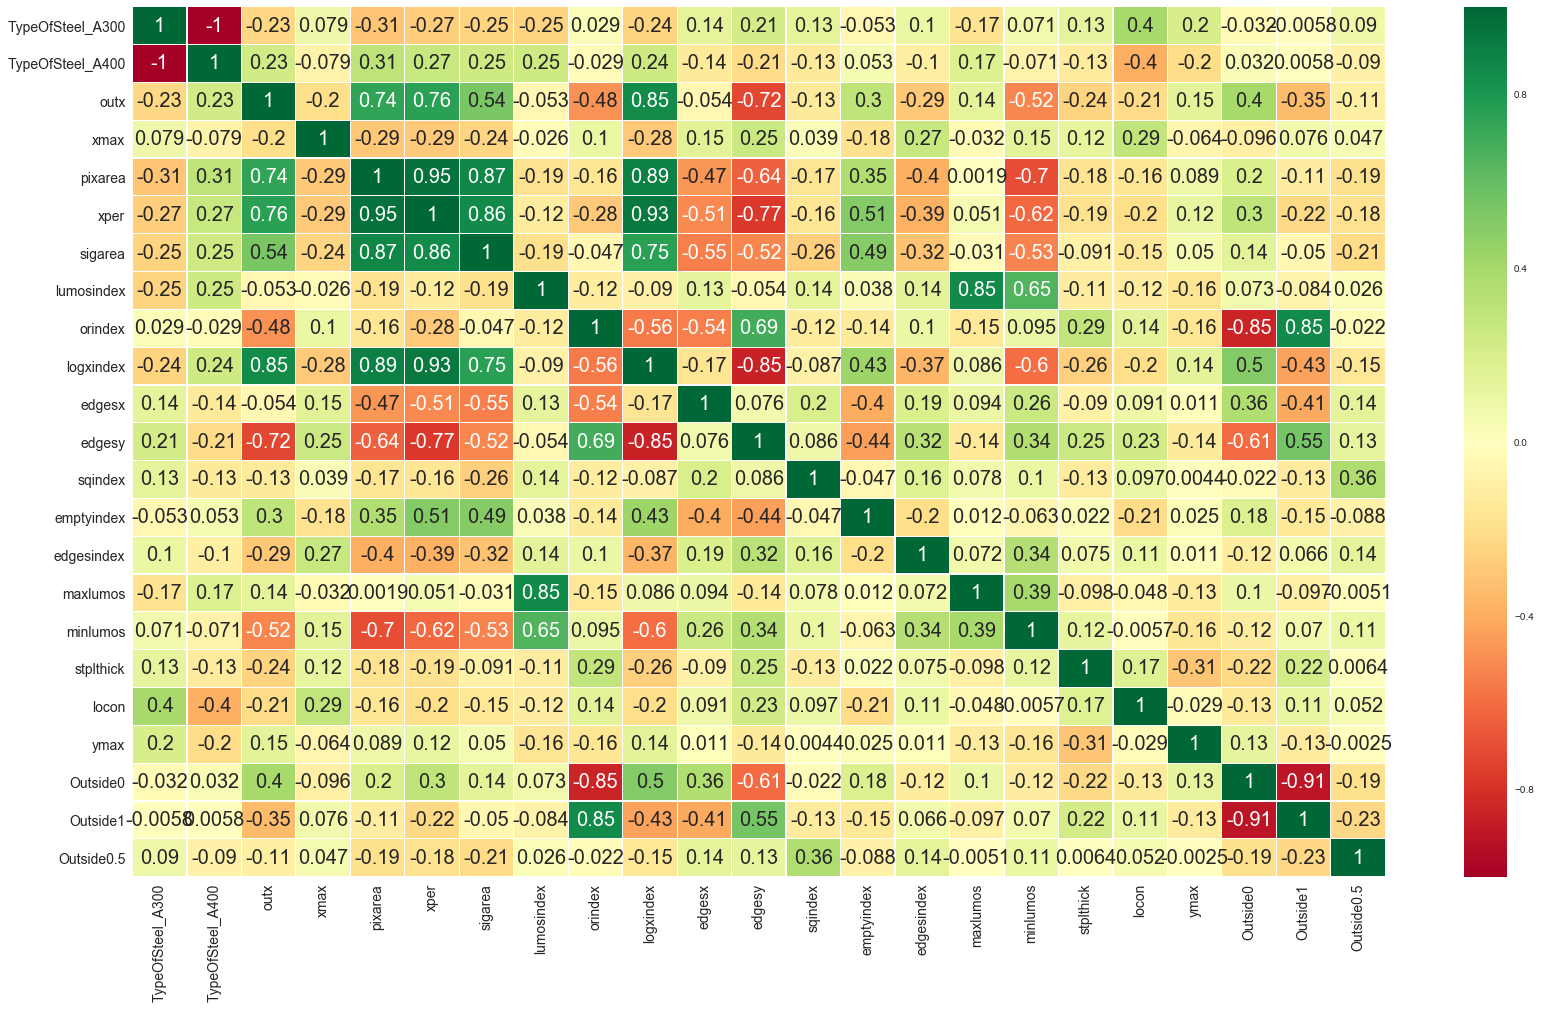

In [94]:
#data.drop(['X_Minimum','Y_Minimum','Sum_of_Luminosity','LogOfAreas','Log_Y_Index','yper'],axis=1,inplace=True)
workdata=data
sns.heatmap(workdata.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(25,16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [95]:
workdata.columns

Index([u'TypeOfSteel_A300', u'TypeOfSteel_A400', u'outx', u'xmax', u'pixarea',
       u'xper', u'sigarea', u'lumosindex', u'orindex', u'logxindex', u'edgesx',
       u'edgesy', u'sqindex', u'emptyindex', u'edgesindex', u'maxlumos',
       u'minlumos', u'stplthick', u'locon', u'ymax', u'Outside0', u'Outside1',
       u'Outside0.5'],
      dtype='object')

# Part3: Predictive Modeling

We have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a steel plate is faulty or not. Following are the algorithms I will use to make the model:

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

In [38]:
#Adding target variable "Faults" to the new dataframe
workdata['Faults']=Faultt
workdata.head()

,TypeOfSteel_A300,TypeOfSteel_A400,Outside0,Outside1,Outside0.5,outx,xmax,pixarea,xper,sigarea,...,edgesy,sqindex,emptyindex,edgesindex,maxlumos,minlumos,stplthick,locon,ymax,Faults
0,1,0,0,1,0,-0.371043,-1.187364,-0.304108,-0.431590,-0.197547,...,0.585790,0.226189,0.176728,-0.994300,-1.022875,0.002708,-0.154535,-0.728072,0.816836,0
1,1,0,1,0,0,-0.143140,-1.113661,-0.846879,0.028148,-1.160873,...,-0.670619,-1.931274,-1.657630,-0.974003,1.890114,0.002708,-0.154535,1.554444,0.767987,0
2,1,0,0,1,0,-0.433971,-0.912473,-0.575716,-0.964621,-0.947658,...,0.774382,0.997710,-1.136871,-0.448284,-0.105823,0.342649,0.027555,1.320693,0.264177,1
3,1,0,1,0,0,-0.071708,-1.149517,-0.949679,-0.011297,-1.172751,...,0.774382,-1.921708,-0.911599,-1.019255,2.699278,0.497168,-0.154535,-0.686821,-1.774901,0
4,0,1,1,0,0,1.646068,-0.832794,1.711804,1.452633,1.258725,...,-1.237261,-0.706480,0.191356,-0.911116,-0.267656,-1.511576,-0.700803,-0.714321,0.413073,0


In [39]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [40]:
train,test=train_test_split(workdata,test_size=0.3,random_state=0,stratify=workdata['Faults'])
train_X=train[train.columns[:-1]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[:-1]]
test_Y=test[test.columns[-1:]]
X=workdata[workdata.columns[:-1]]
Y=workdata['Faults']

In [41]:
from sklearn.model_selection import GridSearchCV

### Radial Support Vector Machines(rbf-SVM)

In [42]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

('Accuracy for rbf SVM is ', 0.8602941176470589)


In [43]:
# Hyperparameter tuning
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
0.8475699558173785
SVC(C=0.6, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   38.8s finished


### Linear Support Vector Machine(linear-SVM)

In [44]:
model=svm.SVC(kernel='linear',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

('Accuracy for linear SVM is', 0.8186274509803921)


In [45]:
# Hyperparameter tuning
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
0.8026509572901326
SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   18.1s finished


### Logistic Regression

In [46]:
model = LogisticRegression(C=1.0)
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

('The accuracy of the Logistic Regression is', 0.8161764705882353)


In [47]:
# Hyperparameter tuning
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'C':C}
gd=GridSearchCV(estimator=LogisticRegression(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
0.8173784977908689
LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.3s finished


### Decision Tree

In [48]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

('The accuracy of the Decision Tree is', 0.8137254901960784)


In [49]:
# Change Criterion
model=DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

('The accuracy of the Decision Tree is', 0.8333333333333334)


In [50]:
# Change Criterion
model=DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

('The accuracy of the Decision Tree is', 0.8333333333333334)


### K-Nearest Neighbours(KNN)

In [51]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

('The accuracy of the KNN is', 0.8406862745098039)


Now the accuracy for the KNN model changes as we change the values for **n_neighbours** attribute. The default value is **5**. Lets check the accuracies over various values of n_neighbours.

In [52]:
# Hyperparameter tuning
a_index=list(range(3,50))
hyper={'n_neighbors':a_index}
gd=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 47 candidates, totalling 141 fits
0.841678939617084
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')


[Parallel(n_jobs=1)]: Done 141 out of 141 | elapsed:   10.3s finished


### Gaussian Naive Bayes

In [53]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

('The accuracy of the NaiveBayes is', 0.7156862745098039)


### Random Forests

In [54]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

('The accuracy of the Random Forests is', 0.8676470588235294)


In [55]:
# Hyperparameter tuning
a_index=list(range(70,200,10))
hyper={'n_estimators':a_index}
gd=GridSearchCV(estimator=RandomForestClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 13 candidates, totalling 39 fits


[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:   35.0s finished


0.8652430044182622
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=90, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


The best score for Rbf-Svm is **86.1% with C=1 and gamma=0.1**.
For RandomForest, score is abt **87.2% with n_estimators=100**.

The accuracy of a model is not the only factor that determines the robustness of the classifier. Let's say that a classifier is trained over a training data and tested over the test data and it scores an accuracy of 90%.

Now this seems to be very good accuracy for a classifier, but can we confirm that it will be 90% for all the new test sets that come over??. The answer is **No**, because we can't determine which all instances will the classifier will use to train itself. As the training and testing data changes, the accuracy will also change. It may increase or decrease. This is known as **model variance**.

To overcome this and get a generalized model,we use **Cross Validation**.


# Cross Validation

Many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset. 

1)The K-Fold Cross Validation works by first dividing the dataset into k-subsets.

2)Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.

3)We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.

This is called K-Fold Cross Validation.

4)An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

In [56]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest','Linear Svm']
models=[svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=17),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=140),svm.SVC(kernel='linear')]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Radial Svm,0.856367,0.030045
Logistic Regression,0.815114,0.037878
KNN,0.849003,0.033479
Decision Tree,0.827685,0.015174
Naive Bayes,0.700300,0.016691
Random Forest,0.868927,0.033593
Linear Svm,0.811454,0.024051


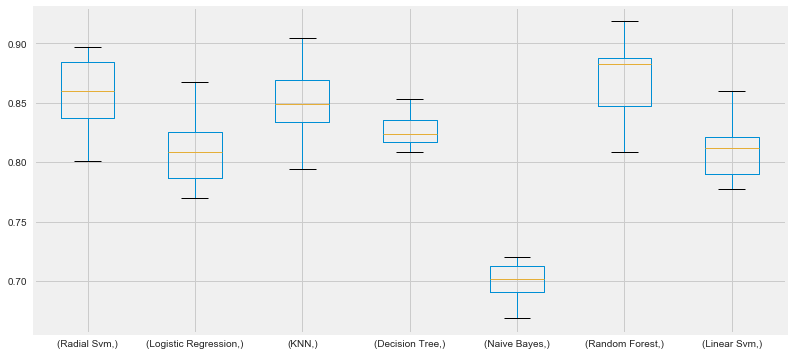

In [57]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

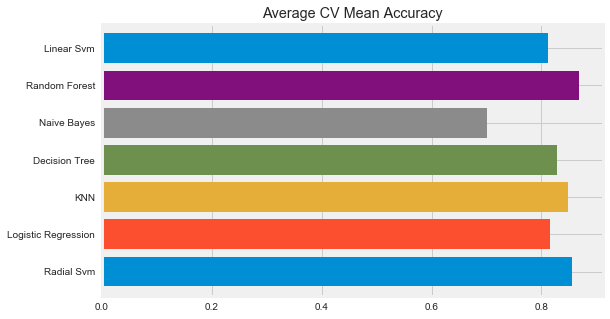

In [58]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

The classification accuracy can be sometimes misleading due to imbalance. We can get a summarized result with the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.

## Confusion Matrix

It gives the number of correct and incorrect classifications made by the classifier.

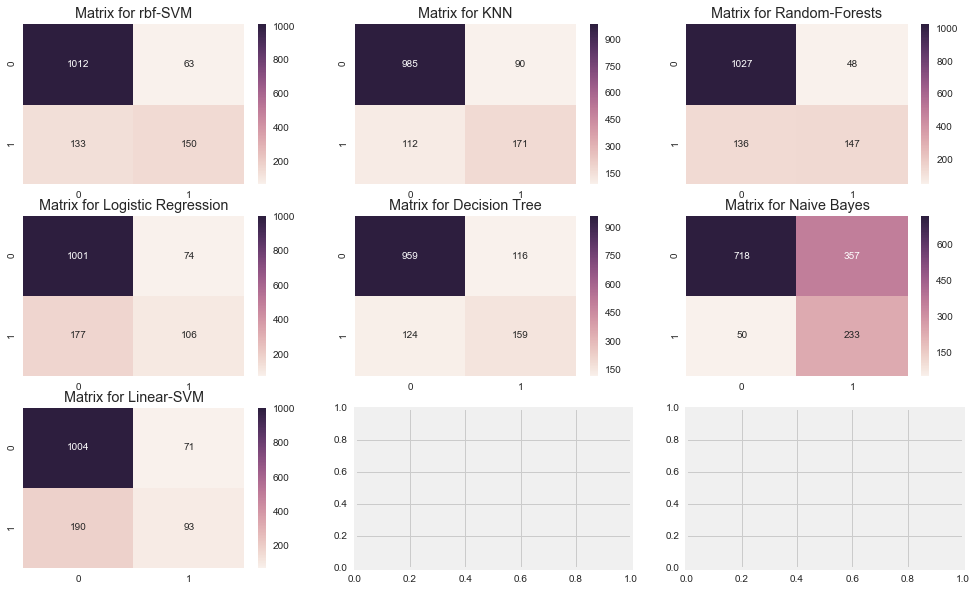

In [59]:
f,ax=plt.subplots(3,3,figsize=(15,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=17),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=140),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Naive Bayes')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Linear-SVM')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

### Interpreting Confusion Matrix

The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong predictions made. Lets consider the first plot for rbf-SVM:

1)The no. of correct predictions are **1012(for Not-Faulty) + 150(for Faulty)** with the mean CV accuracy being **(1012+150)/1358 = 85.56%** which we did get earlier.

2)**Errors**-->  Wrongly Classified 63 Not-Faulty Steel Plates as faulty and 133 Faulty as Not-Faulty. 

# Ensembling

Ensembling is a good way to increase the accuracy or performance of a model. In simple words, it is the combination of various simple models to create a single powerful model.

Lets say we want to buy a phone and ask many people about it based on various parameters. So then we can make a strong judgement about a single product after analysing all different parameters. This is **Ensembling**, which improves the stability of the model. Ensembling can be done in ways like:

1)Voting Classifier

2)Bagging

3)Boosting.

## Voting Classifier

It is the simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based on the prediction of all the submodels. The submodels or the basemodels are all of diiferent types.

In [60]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=17)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.8,gamma=0.2)),
                                              ('RFor',RandomForestClassifier(n_estimators=140,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('SVM',svm.SVC(probability=True,kernel='linear',C=1,gamma=0.1))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

C:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


('The accuracy for ensembled model is:', 0.8602941176470589)


C:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.si

('The cross validated score is', 0.859282516737433)


C:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Bagging

Bagging is a general ensemble method. It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging,there is reduction in variance. Unlike Voting Classifier, Bagging makes use of similar classifiers.

#### Bagged KNN

Bagging works best with models with high variance. An example for this can be Decision Tree or Random Forests. We can use KNN with small value of **n_neighbours**, as small value of n_neighbours.

In [61]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=17),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

('The accuracy for bagged KNN is:', 0.8504901960784313)
('The cross validated score for bagged KNN is:', 0.8505181050522399)


#### Bagged DecisionTree


In [62]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

('The accuracy for bagged Decision Tree is:', 0.8578431372549019)
('The cross validated score for bagged Decision Tree is:', 0.8718964982586709)


## Boosting

Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model.Boosting works as follows:

A model is first trained on the complete dataset. Now the model will get some instances right while some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it. Thus it will try to predict the wrong instance correctly. Now this iterative process continous, and new classifers are added to the model until the limit is reached on the accuracy.

#### AdaBoost(Adaptive Boosting)

The weak learner or estimator in this case is a Decision Tree.  But we can change the dafault base_estimator to any algorithm of our choice.

In [63]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

('The cross validated score for AdaBoost is:', 0.8446301464624779)


#### Stochastic Gradient Boosting

Here too the weak learner is a Decision Tree.

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=700,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())
# Fitting: as we know it is best
grad.fit(train_X,train_Y)
predicting=grad.predict(test_X)

('The cross validated score for Gradient Boosting is:', 0.8747408282047612)


#### XGBoost

In [65]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=700,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

C:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.si

('The cross validated score for XGBoost is:', 0.8696528871078033)


C:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


We will try to increase it with Hyper-Parameter Tuning

#### Hyper-Parameter Tuning for SGB

In [66]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


KeyboardInterrupt: 

The maximum accuracy we can get with Stochastic Gradient Boosting is **87.47% with n_estimators=700 and learning_rate=0.1**

### Confusion Matrix for the Best Model

In [ ]:
best=GradientBoostingClassifier(n_estimators=700,random_state=0,learning_rate=0.1)
result=cross_val_predict(best,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),annot=True,fmt='2.0f')
plt.show()
result=cross_val_score(best,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for SGB is:',result.mean())

In [96]:
#FOR TEST
#predictest=grad.predict(workdata)
#print(predictest)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 

In [97]:
#workdata['Faults']=predictest
#workdata.to_csv('submission303.csv', encoding='utf-8')